In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv(r"//DC1/data/rotimi.kolawole\My Documents/telescope_data.csv", index_col = 0)

In [135]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

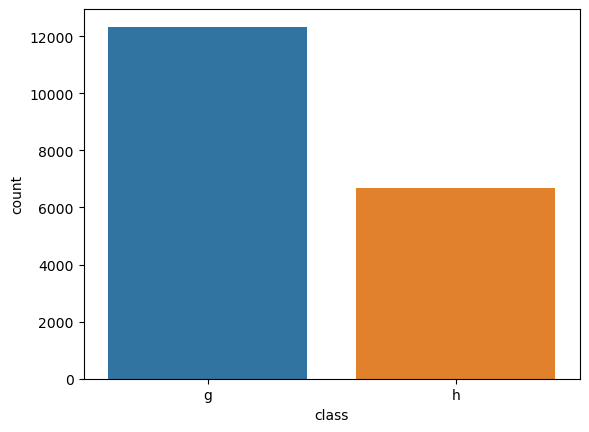

In [136]:
sb.countplot(data = df , x = "class");

In [137]:
value_counts_class = df["class"].value_counts().index
value_counts = df["class"].value_counts()

In [138]:
x =(23/34)
"{:.2f}%".format(x*100)

'67.65%'

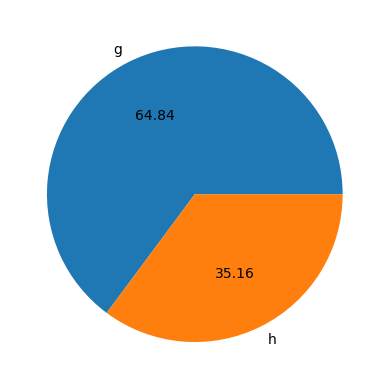

In [139]:
plt.pie(value_counts,labels=value_counts_class,autopct = '%.2f');

In [140]:


df['class'].value_counts()

g    12332
h     6688
Name: class, dtype: int64

In [141]:
df['class'] = df["class"].map({"g":0,"h":1})

In [142]:
df["class"]

0        0
1        0
2        0
3        0
4        0
        ..
19015    1
19016    1
19017    1
19018    1
19019    1
Name: class, Length: 19020, dtype: int64

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
columns = df.columns[:-1].to_list()

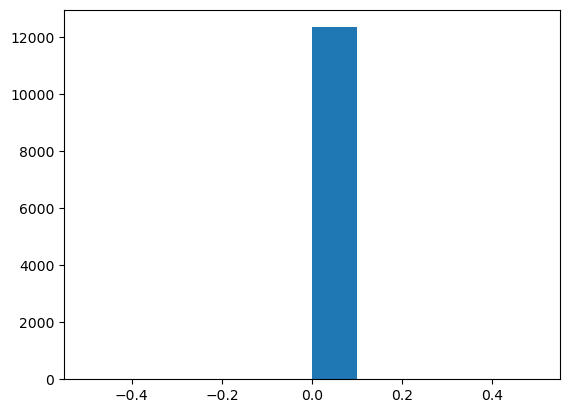

In [145]:
plt.hist(df[df["class"]==0]["class"]);

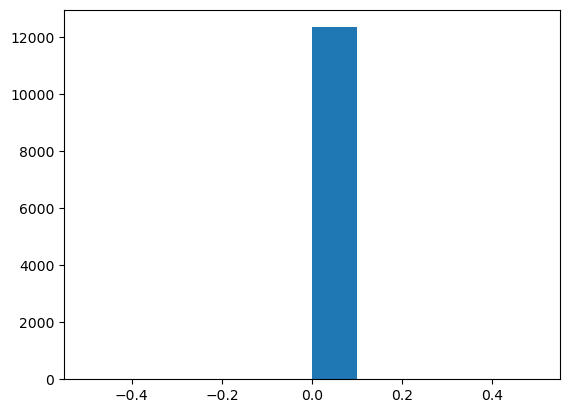

In [146]:
plt.hist(df[df["class"] == 0]["class"]);

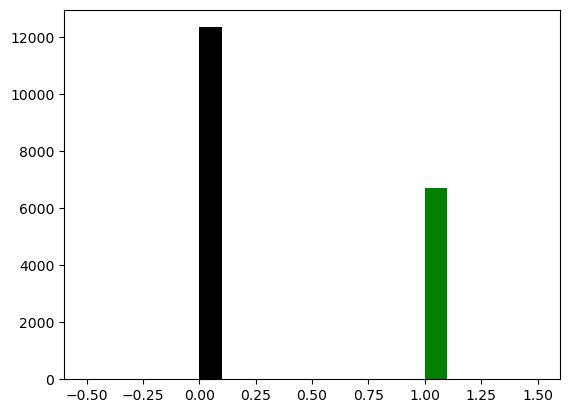

In [147]:
plt.hist(df[df["class"]==1]["class"], color= "g", label = "gamma")
plt.hist(df[df["class"]==0]["class"],color= "k", label = "Alpha")
plt.show();

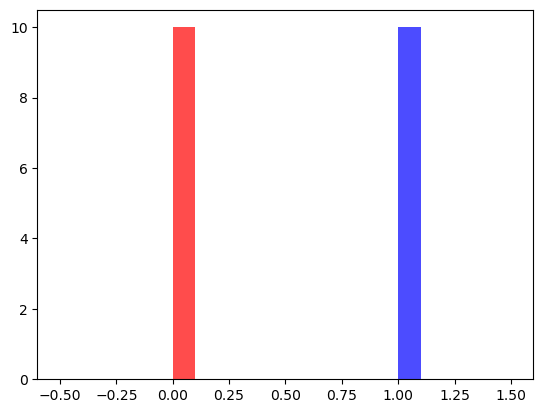

In [148]:
plt.hist(df[df["class"]==1]["class"] , color= "blue", label = "gamma", alpha = 0.7 , density = True)
plt.hist(df[df["class"]==0]["class"], color= "Red", label = "alpha", alpha = 0.7 , density = True);

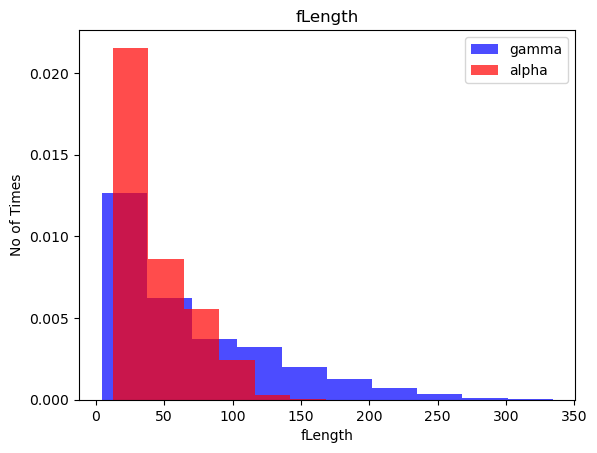

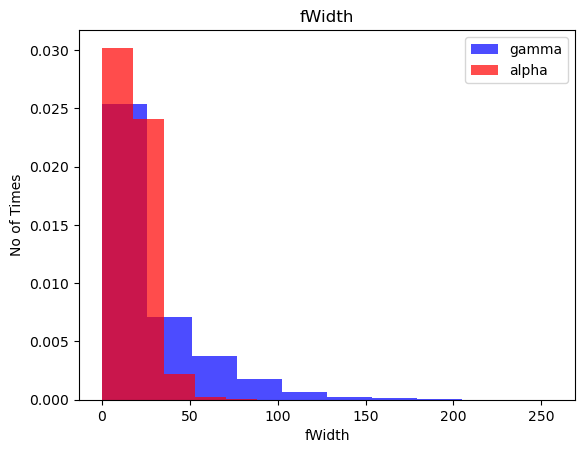

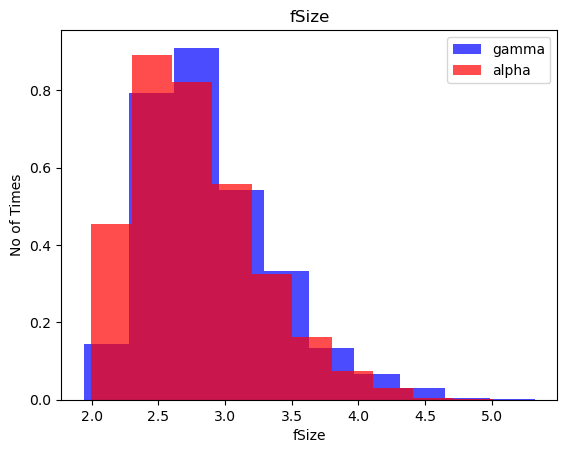

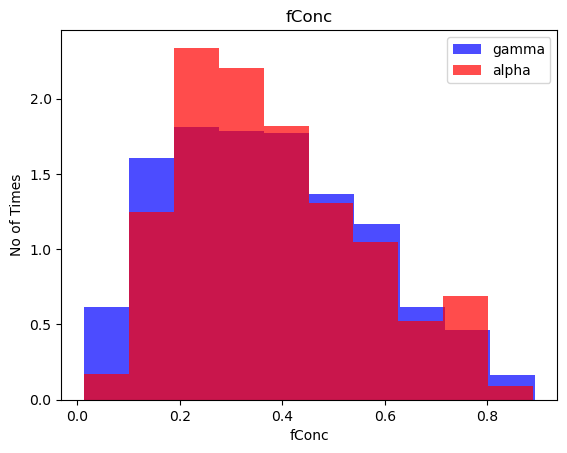

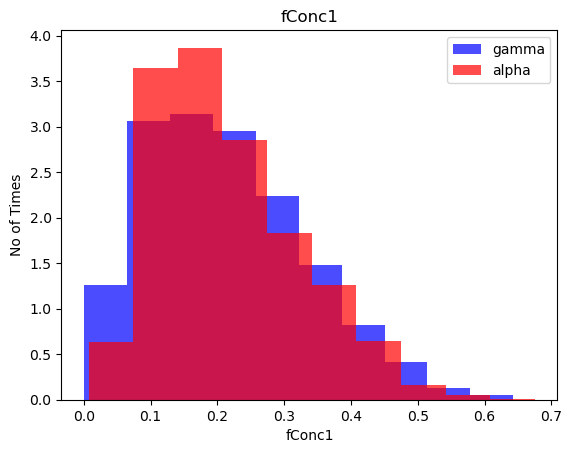

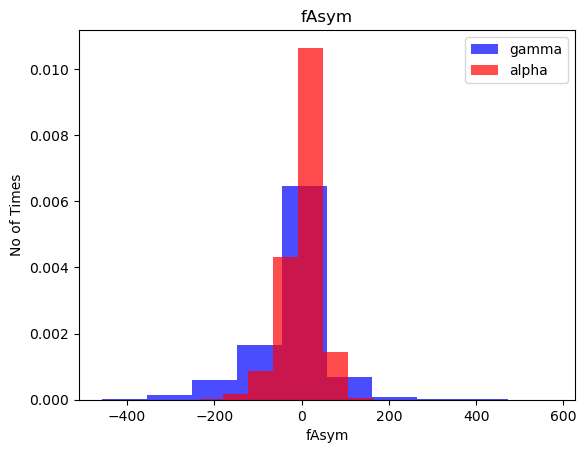

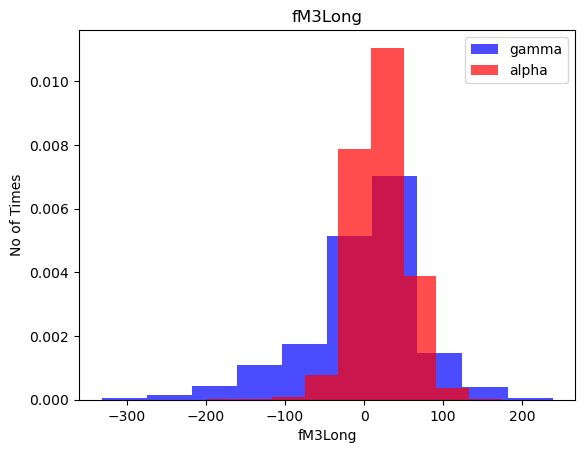

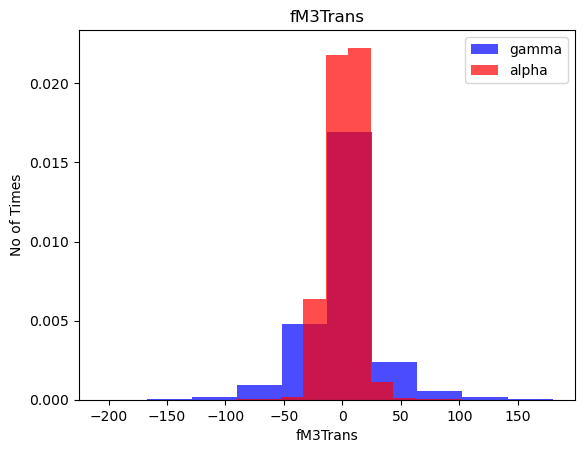

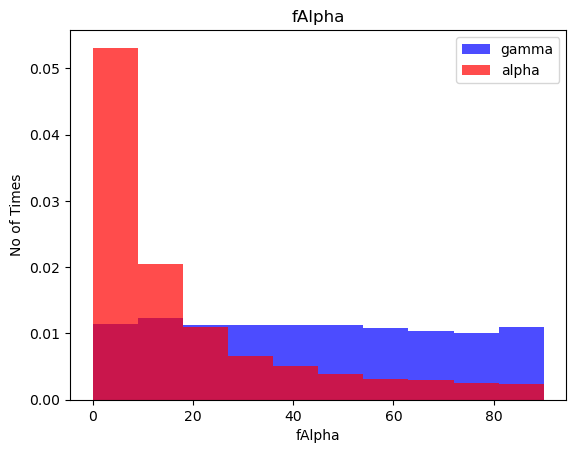

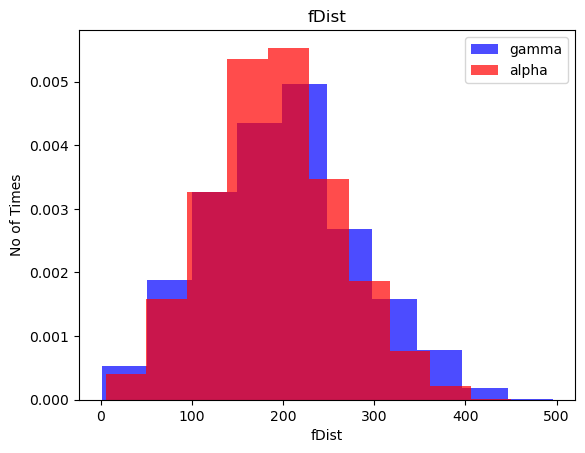

In [149]:
for col in columns:
    plt.hist(df[df["class"]==1][col] , color= "blue", label = "gamma", alpha = 0.7 , density = True)
    plt.hist(df[df["class"]==0][col] , color= "Red", label = "alpha", alpha = 0.7 , density = True)
    plt.title(col)
    plt.ylabel("No of Times")
    plt.xlabel(col)
    plt.legend()
    plt.show();

In [150]:
train, validation , test = np.split(df.sample(frac = 1),[int(.6*len(df)),int(0.8*len(df))])

In [151]:
# # validation.shape 
# 3804/df.shape[0]
# # x , y , z = np.split(df.sample(frac = .8),[int(.4*len(df)),int(.6*len(df))])
# "{:.2f}%".format((z.shape[0]/df.shape[0])*100)

In [152]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

Scaling the columnns can be very important since it helps us maintain uniformity across columns  foSr instances where we have different scales in columns

In [153]:
r_i = RandomOverSampler()

In [154]:
def Scaler_function(data ,oversample = False):
    """This function helps to scale the dataframes helping to have uniform scales across
    all columns in the Dataframe"""
    
    """There is also need to balance the two labels . This ois to help prevent
    Oversampling in classes of labels"""
    
    X = data[data.columns[:-1]].values
    Y = data[data.columns[-1]].values
    
    
    standard_scaler = StandardScaler()
    
    standard_scaler.fit_transform(X)
    
    
    if oversample :
        rand_sample = RandomOverSampler()
        X,Y = rand_sample.fit_resample(X,Y)
    
    data_ = np.hstack((X, Y.reshape(-1,1)))
    
    return data_ , X , Y

In [155]:
train , X_train , y_label = Scaler_function(train , oversample = True)
validation , X_val, y_val = Scaler_function(validation , oversample = False)
test , X_test, y_test = Scaler_function(test , oversample = False)

In [161]:
sum(y_label==0)

7396

In [164]:
sum(df["class"]==1)

6688

#### Model Fitting and Evaluating

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

##### Kneigbhors

In [33]:
knn = KNeighborsClassifier(n_neighbors=7
                           
                          )
knn.fit(X_train,y_label)

KNeighborsClassifier(n_neighbors=7)

In [34]:
y_pred = knn.predict(X_test)

In [35]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83      2496
           1       0.68      0.70      0.69      1308

    accuracy                           0.78      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.79      0.78      0.79      3804



###### Naive Baye's

In [36]:
from sklearn.naive_bayes import GaussianNB

In [37]:
nb_model = GaussianNB()
nb_model.fit(X_train,y_label)

GaussianNB()

In [38]:
nb_pred = nb_model.predict(X_test)

In [39]:
print(classification_report(nb_pred , y_test))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80      2988
           1       0.41      0.67      0.50       816

    accuracy                           0.72      3804
   macro avg       0.65      0.70      0.65      3804
weighted avg       0.79      0.72      0.74      3804



In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train,y_label)

C:\Users\rotimi.kolawole.ZEDCREST\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
lg_test = lg_model.predict(X_test)
print(classification_report(lg_test , y_test))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      2463
           1       0.70      0.70      0.70      1341

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



##### Support Vector Machine

In [43]:
from sklearn.svm import SVC

In [44]:
svm = SVC()
svm = svm.fit(X_train , y_label)

In [45]:
svm_predict = svm.predict(X_test)

In [46]:
print(classification_report(svm_predict, y_test))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      2569
           1       0.69      0.75      0.72      1235

    accuracy                           0.81      3804
   macro avg       0.79      0.80      0.79      3804
weighted avg       0.82      0.81      0.81      3804



#### Neural network

sum of indiviual features * weight  gives the neuron . The neuron also adds up some biased to give the activation function

In [47]:
# pip install tensorflow
import  tensorflow as tf

In [1]:
def plot_history(X):
    
    " this helps to see how the model loss functions performs over time"
    
    fig,( ax1,ax2 )= plt.subplots(1,2,figsize = (10,4))
    
    
    ax1.plot(X.history["loss"], label = "Training_loss")
    ax1.plot(X.history["val_loss"],label = "validation_loss")
    ax1.set_xlabel("Epoch")
    ax1.set_ylabel("Binary Crossentropy")
    ax1.legend()
    plt.grid(True)
    
    ax2.plot(X.history["val_accuracy"], label = "val_accuracy")
    ax2.plot(X.history["accuracy"], label = "accuracy")
    ax2.set_xlabel("Epoch")
    ax2.set_ylabel("Binary Crossentropy")
    ax2.legend()
    ax2.grid(True)
    
    
    plt.show()


In [69]:
def training_func(X_train, y_label , dropout_prob , epoch, lr, batch_size, num_nodes):
    nn_model = tf.keras.Sequential([tf.keras.layers.Dense(num_nodes,activation="relu",input_shape = (10,)),
                                     tf.keras.layers.Dropout(dropout_prob),
                                    tf.keras.layers.Dense(num_nodes,activation="relu"),
                                    tf.keras.layers.Dropout(dropout_prob),
                                    tf.keras.layers.Dense(1,activation = 'sigmoid')
                                   ])
    nn_model.compile(optimizer= tf.keras.optimizers.Adam(lr), loss = 'binary_crossentropy',metrics= ["accuracy"])
    History = nn_model.fit(X_train, y_label,epochs = epoch, verbose=0 , validation_split= .2, batch_size = batch_size)
    
    return History, nn_model
        

In [68]:
# training_func(X_train, y_label ,0,100,.01,32,64)

In [ ]:
# num_nodes:64, dropout_prob : 0,lr : 0.01 ,batch_size : 128

In [89]:
nn_model.evaluate(X_val, y_val)[0]

119/119 [==============================] - 0s 2ms/step - loss: 0.3987 - accuracy: 0.8365


0.39865976572036743

In [88]:
nn_model.evaluate?

In [135]:
training_func(X_train,y_label , 64,0,.01, 100,.2, 32,32 )

(<keras.src.callbacks.History at 0x2c0a8714310>,
 <keras.src.engine.sequential.Sequential at 0x2c0a902bb20>)

In [77]:
10000000 < float("inf")

True

num_nodes:16, dropout_prob : 0,lr : 0.01 ,batch_size : 32


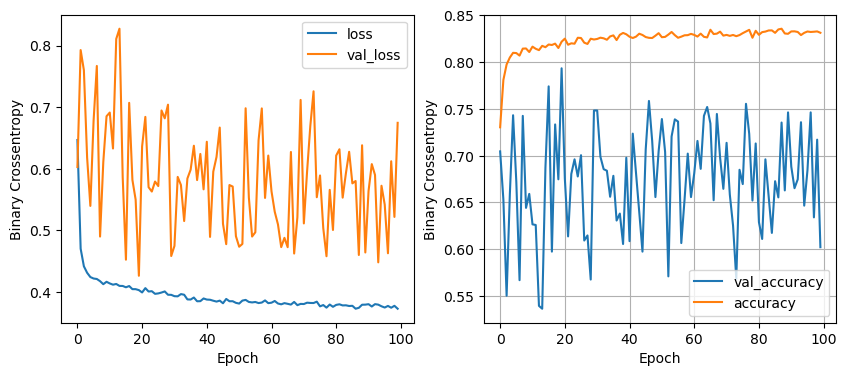

119/119 [==============================] - 0s 2ms/step - loss: 0.3990 - accuracy: 0.8378
num_nodes:16, dropout_prob : 0,lr : 0.01 ,batch_size : 64


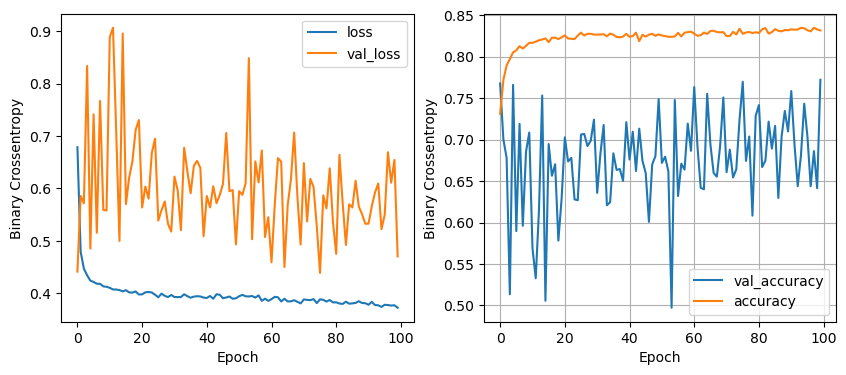

119/119 [==============================] - 0s 3ms/step - loss: 0.4234 - accuracy: 0.8186
num_nodes:16, dropout_prob : 0,lr : 0.01 ,batch_size : 128


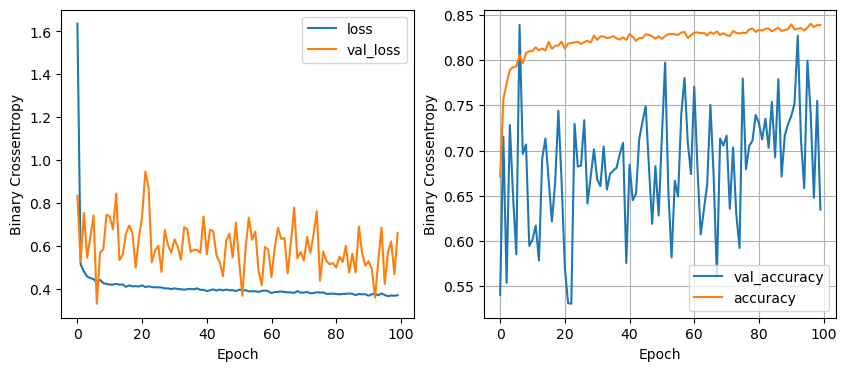

119/119 [==============================] - 0s 2ms/step - loss: 0.3809 - accuracy: 0.8365
num_nodes:16, dropout_prob : 0,lr : 0.005 ,batch_size : 32


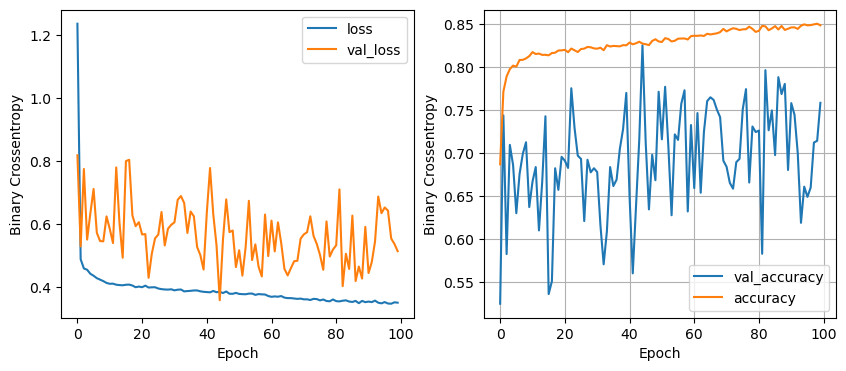

119/119 [==============================] - 0s 2ms/step - loss: 0.3765 - accuracy: 0.8433
num_nodes:16, dropout_prob : 0,lr : 0.005 ,batch_size : 64


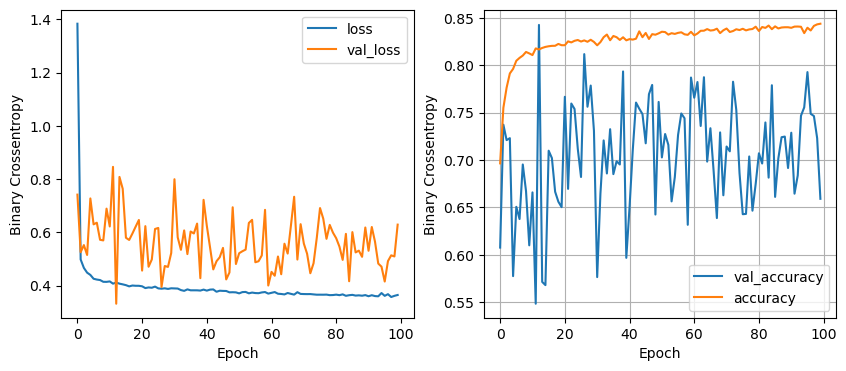

119/119 [==============================] - 0s 2ms/step - loss: 0.3621 - accuracy: 0.8457
num_nodes:16, dropout_prob : 0,lr : 0.005 ,batch_size : 128


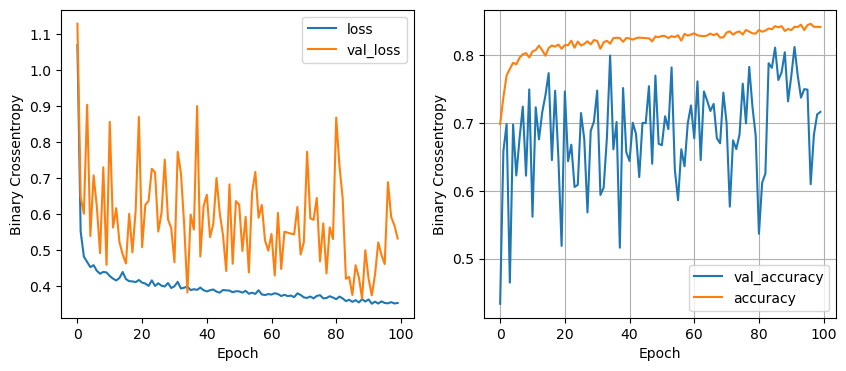

119/119 [==============================] - 0s 2ms/step - loss: 0.3627 - accuracy: 0.8470
num_nodes:16, dropout_prob : 0,lr : 0.0001 ,batch_size : 32


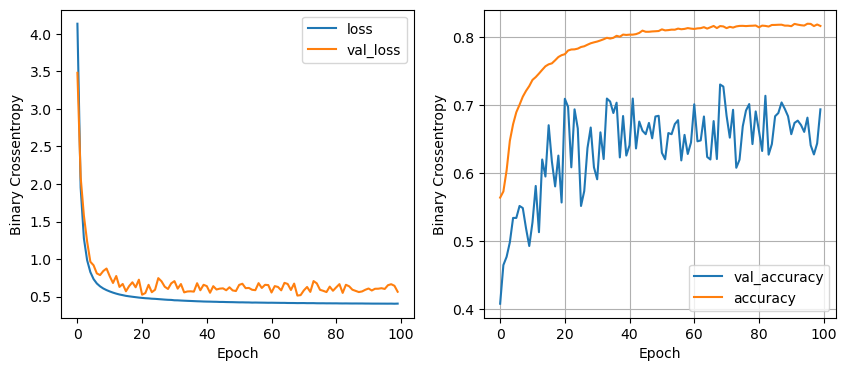

119/119 [==============================] - 0s 2ms/step - loss: 0.4140 - accuracy: 0.8218
num_nodes:16, dropout_prob : 0,lr : 0.0001 ,batch_size : 64


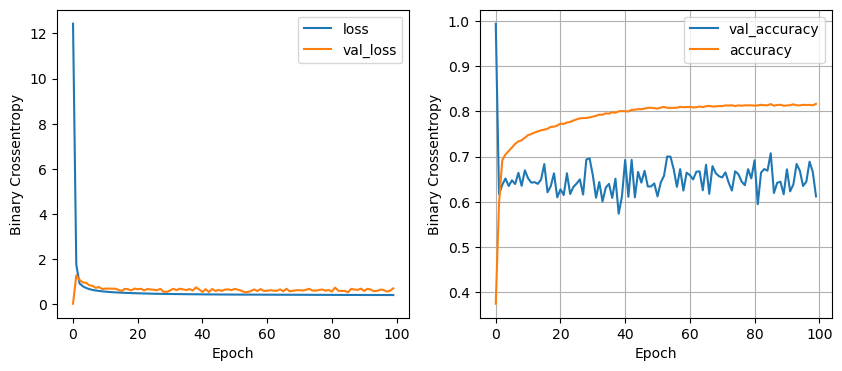

119/119 [==============================] - 0s 2ms/step - loss: 0.4137 - accuracy: 0.8197
num_nodes:16, dropout_prob : 0,lr : 0.0001 ,batch_size : 128


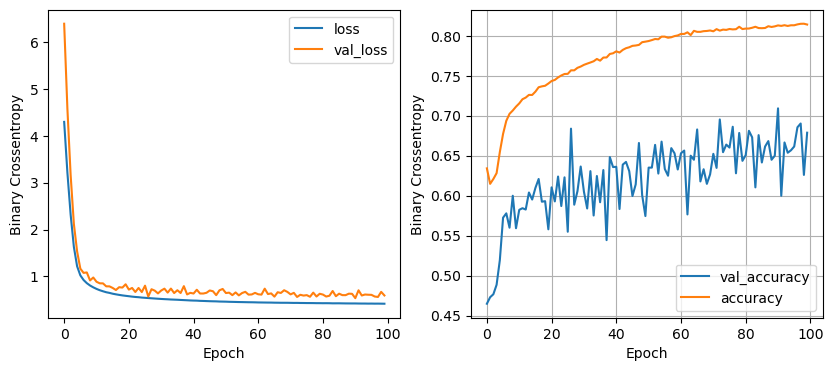

119/119 [==============================] - 0s 2ms/step - loss: 0.4316 - accuracy: 0.8157
num_nodes:16, dropout_prob : 0.2,lr : 0.01 ,batch_size : 32


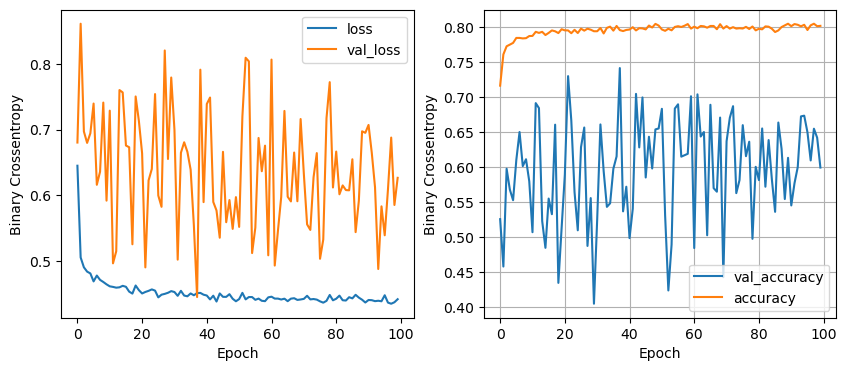

119/119 [==============================] - 0s 2ms/step - loss: 0.4212 - accuracy: 0.8273
num_nodes:16, dropout_prob : 0.2,lr : 0.01 ,batch_size : 64


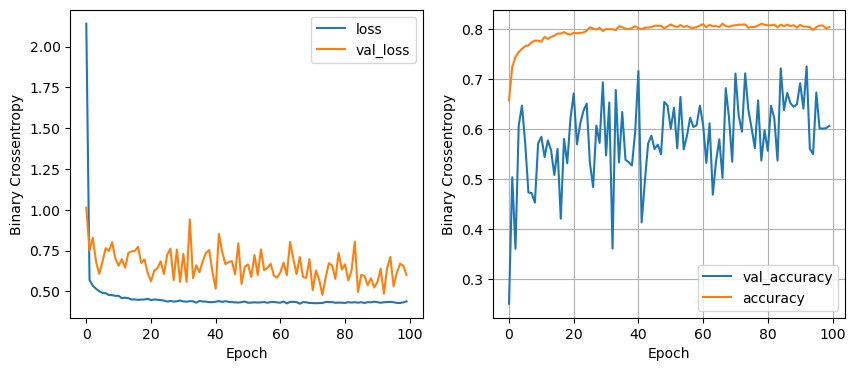

119/119 [==============================] - 0s 2ms/step - loss: 0.4127 - accuracy: 0.8265
num_nodes:16, dropout_prob : 0.2,lr : 0.01 ,batch_size : 128


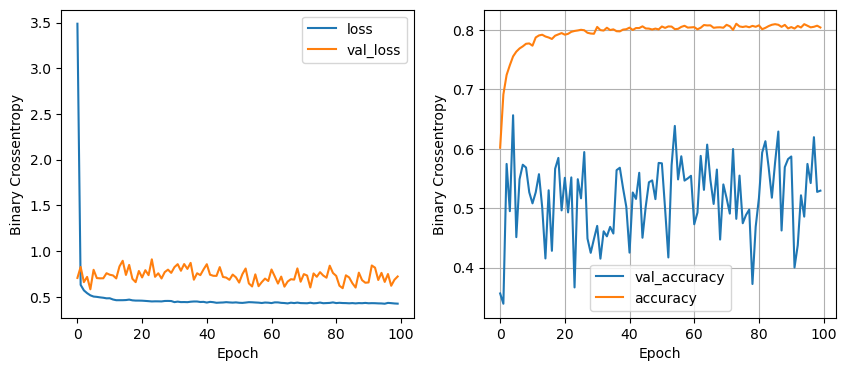

119/119 [==============================] - 0s 1ms/step - loss: 0.4117 - accuracy: 0.8162
num_nodes:16, dropout_prob : 0.2,lr : 0.005 ,batch_size : 32


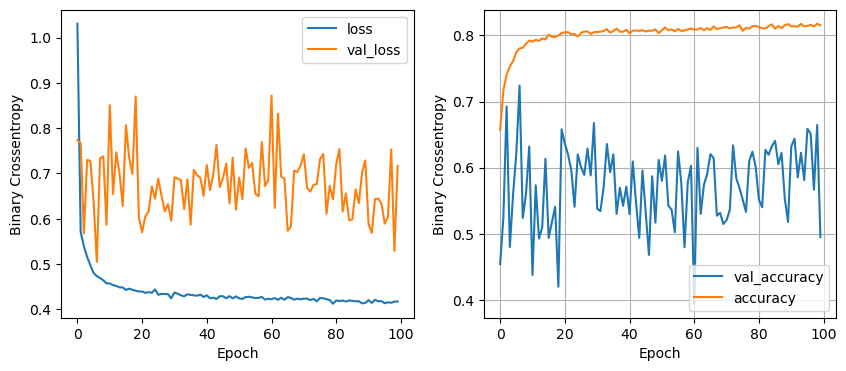

119/119 [==============================] - 0s 2ms/step - loss: 0.4246 - accuracy: 0.8084
num_nodes:16, dropout_prob : 0.2,lr : 0.005 ,batch_size : 64


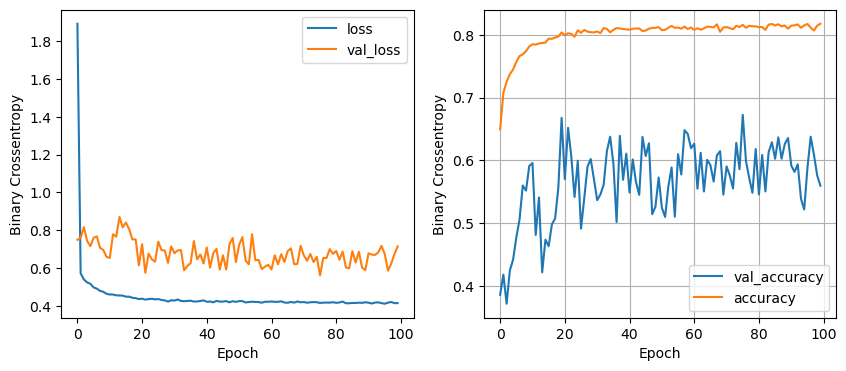

119/119 [==============================] - 0s 2ms/step - loss: 0.4035 - accuracy: 0.8239
num_nodes:16, dropout_prob : 0.2,lr : 0.005 ,batch_size : 128


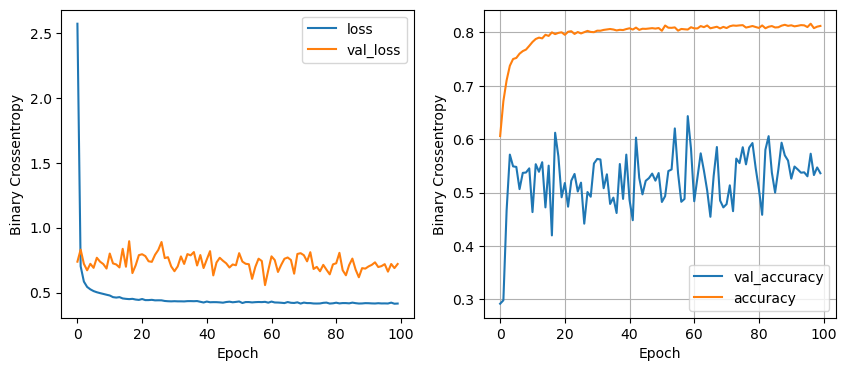

119/119 [==============================] - 0s 3ms/step - loss: 0.4054 - accuracy: 0.8205
num_nodes:16, dropout_prob : 0.2,lr : 0.0001 ,batch_size : 32


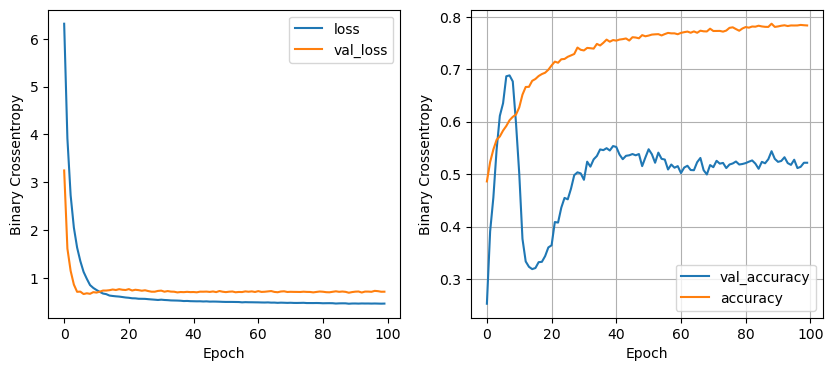

119/119 [==============================] - 0s 2ms/step - loss: 0.4296 - accuracy: 0.8105
num_nodes:16, dropout_prob : 0.2,lr : 0.0001 ,batch_size : 64


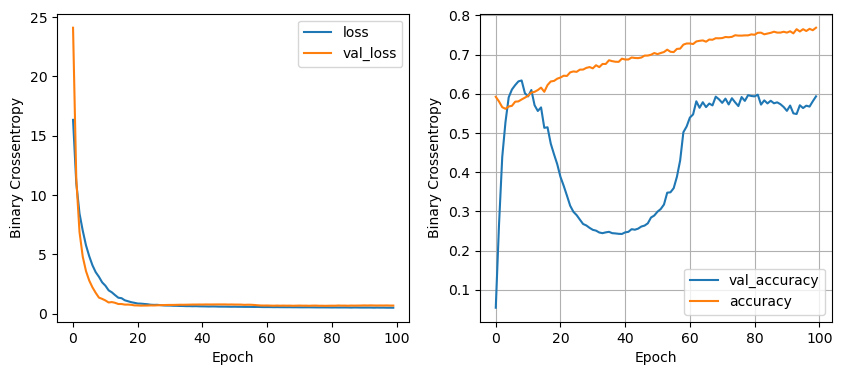

119/119 [==============================] - 0s 2ms/step - loss: 0.4568 - accuracy: 0.8113
num_nodes:16, dropout_prob : 0.2,lr : 0.0001 ,batch_size : 128


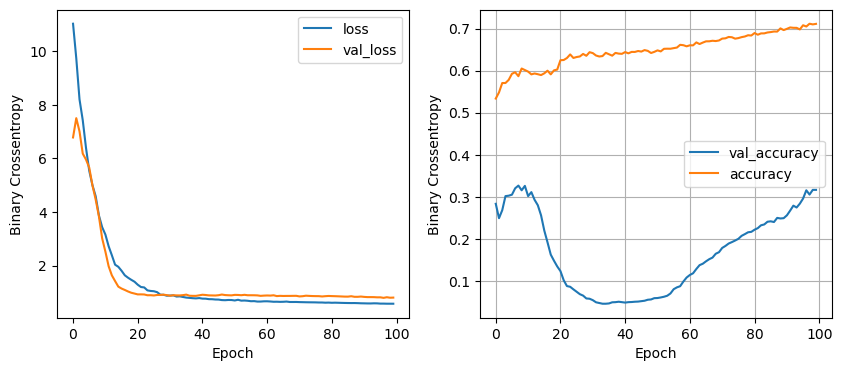

119/119 [==============================] - 0s 2ms/step - loss: 0.5270 - accuracy: 0.7500
num_nodes:32, dropout_prob : 0,lr : 0.01 ,batch_size : 32


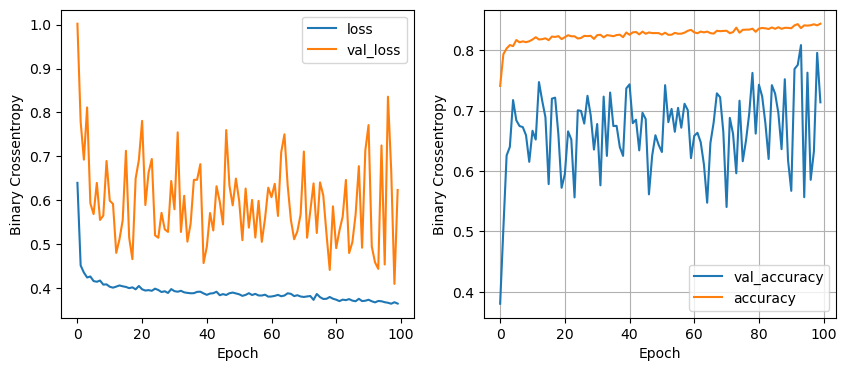

119/119 [==============================] - 0s 2ms/step - loss: 0.3835 - accuracy: 0.8460
num_nodes:32, dropout_prob : 0,lr : 0.01 ,batch_size : 64


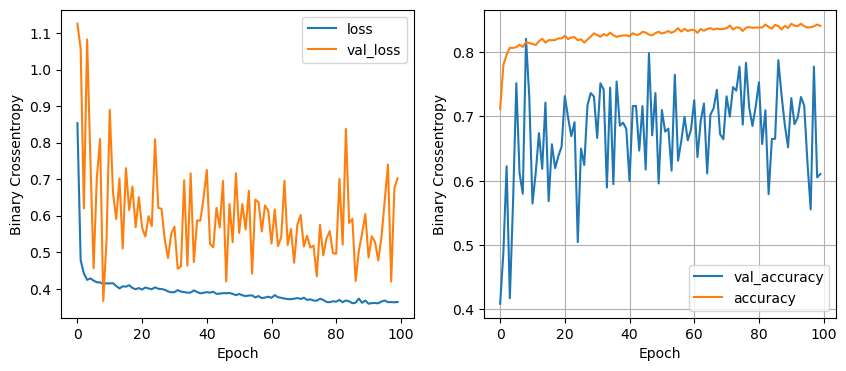

119/119 [==============================] - 0s 2ms/step - loss: 0.3721 - accuracy: 0.8417
num_nodes:32, dropout_prob : 0,lr : 0.01 ,batch_size : 128


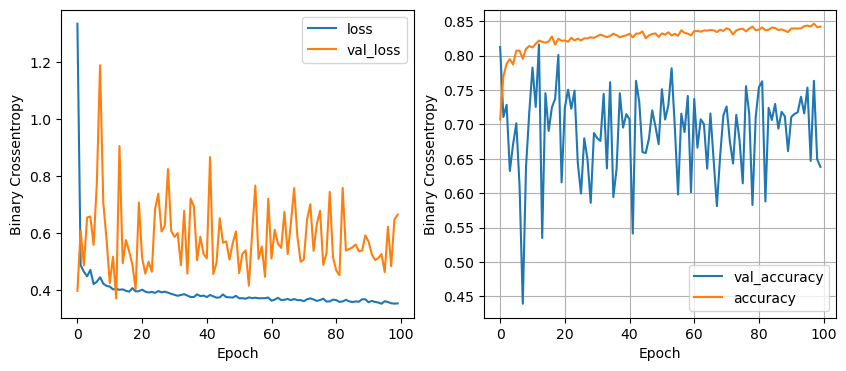

119/119 [==============================] - 0s 2ms/step - loss: 0.3927 - accuracy: 0.8333
num_nodes:32, dropout_prob : 0,lr : 0.005 ,batch_size : 32


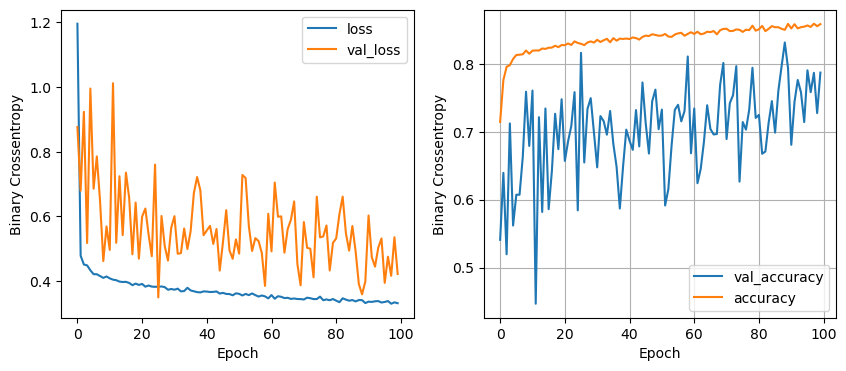

119/119 [==============================] - 0s 2ms/step - loss: 0.3571 - accuracy: 0.8557
num_nodes:32, dropout_prob : 0,lr : 0.005 ,batch_size : 64


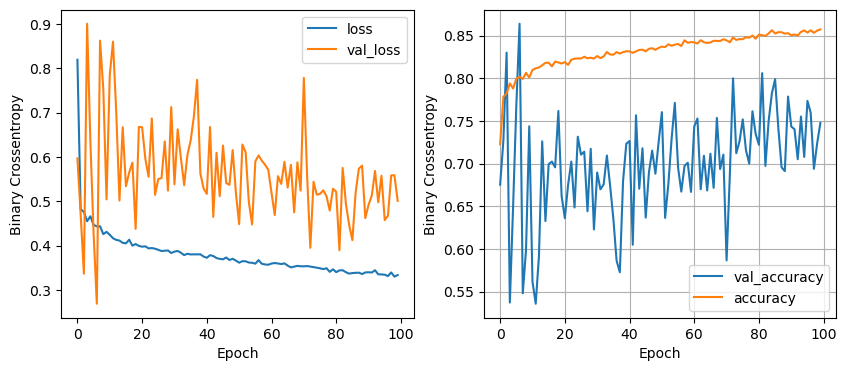

119/119 [==============================] - 0s 2ms/step - loss: 0.3670 - accuracy: 0.8604
num_nodes:32, dropout_prob : 0,lr : 0.005 ,batch_size : 128


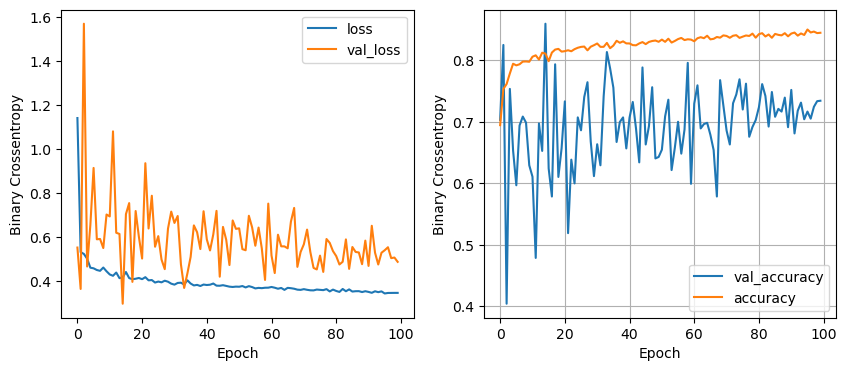

119/119 [==============================] - 0s 2ms/step - loss: 0.3848 - accuracy: 0.8420
num_nodes:32, dropout_prob : 0,lr : 0.0001 ,batch_size : 32


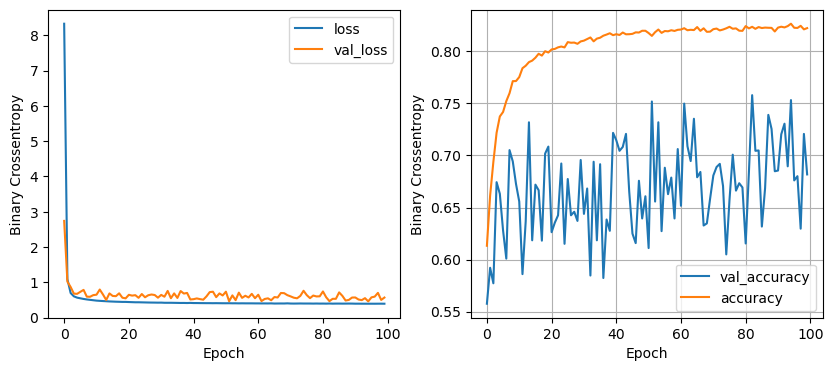

119/119 [==============================] - 0s 2ms/step - loss: 0.4087 - accuracy: 0.8226
num_nodes:32, dropout_prob : 0,lr : 0.0001 ,batch_size : 64


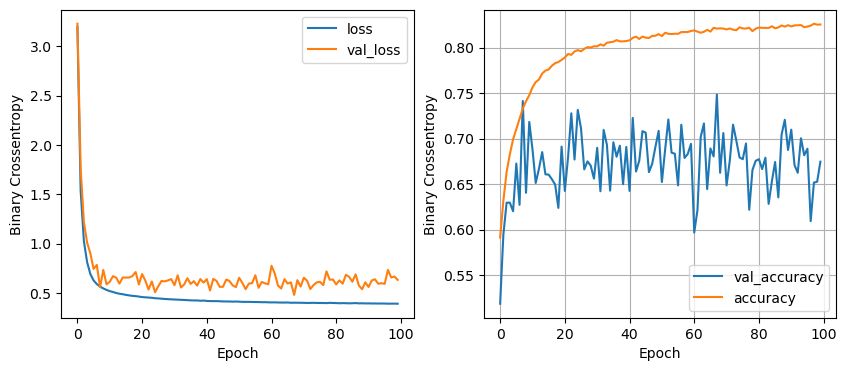

119/119 [==============================] - 0s 2ms/step - loss: 0.4113 - accuracy: 0.8173
num_nodes:32, dropout_prob : 0,lr : 0.0001 ,batch_size : 128


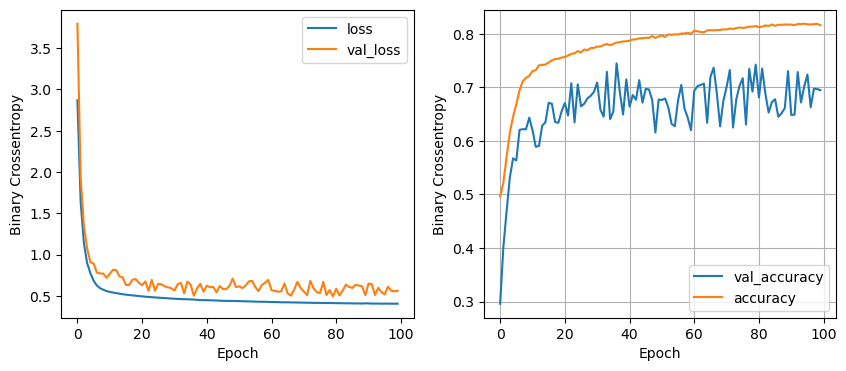

119/119 [==============================] - 0s 2ms/step - loss: 0.4193 - accuracy: 0.8155
num_nodes:32, dropout_prob : 0.2,lr : 0.01 ,batch_size : 32


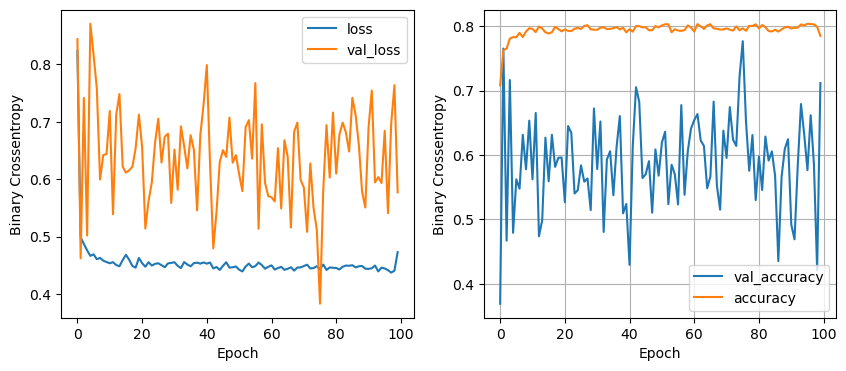

119/119 [==============================] - 0s 2ms/step - loss: 0.4613 - accuracy: 0.8105
num_nodes:32, dropout_prob : 0.2,lr : 0.01 ,batch_size : 64


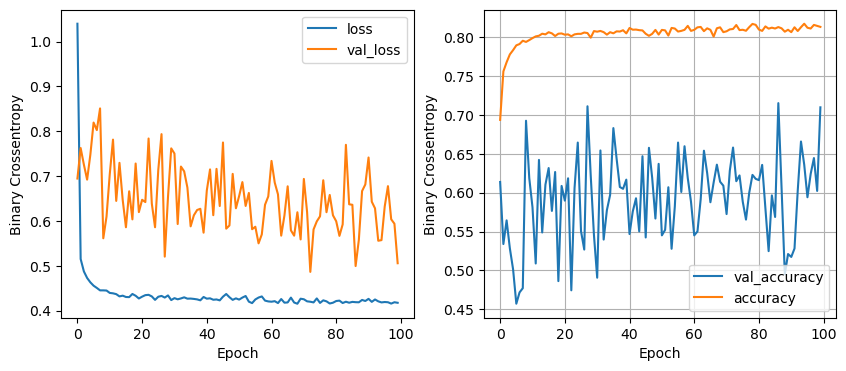

119/119 [==============================] - 0s 2ms/step - loss: 0.4103 - accuracy: 0.8294
num_nodes:32, dropout_prob : 0.2,lr : 0.01 ,batch_size : 128


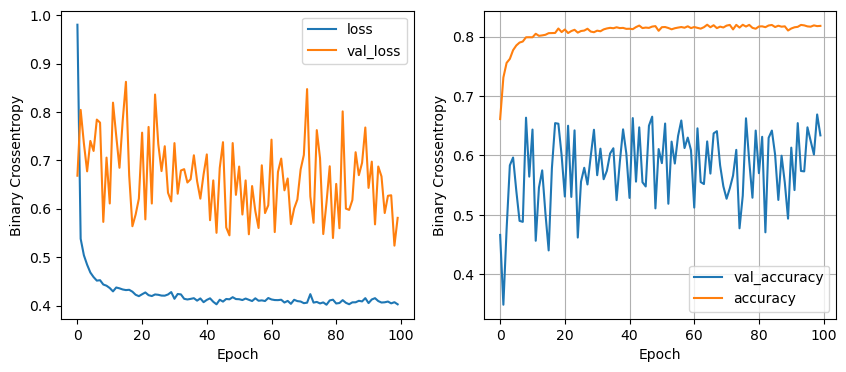

119/119 [==============================] - 0s 2ms/step - loss: 0.3883 - accuracy: 0.8360
num_nodes:32, dropout_prob : 0.2,lr : 0.005 ,batch_size : 32


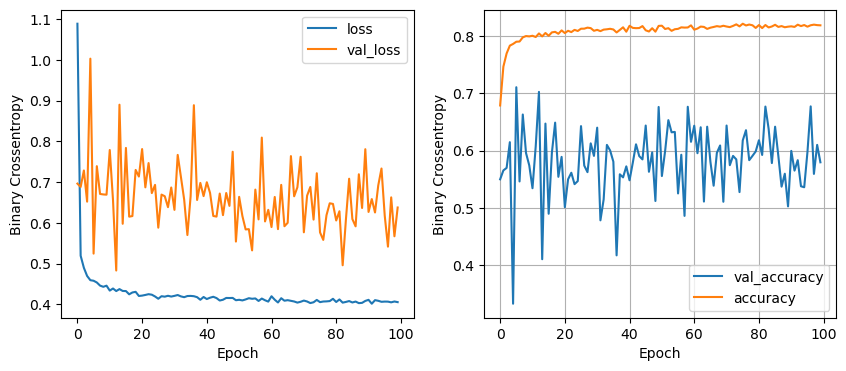

119/119 [==============================] - 0s 2ms/step - loss: 0.4066 - accuracy: 0.8323
num_nodes:32, dropout_prob : 0.2,lr : 0.005 ,batch_size : 64


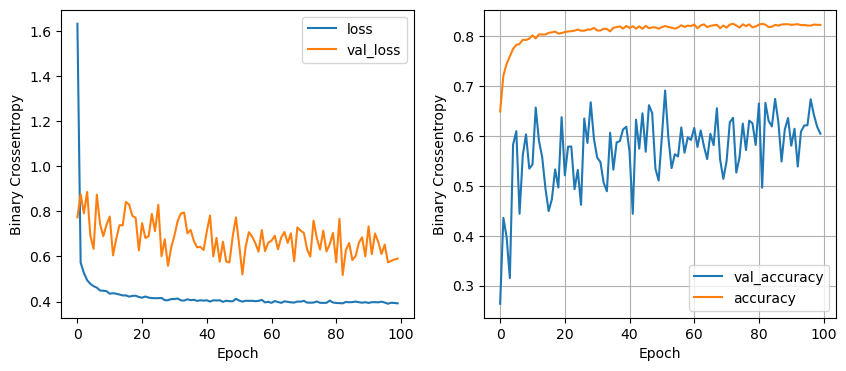

119/119 [==============================] - 0s 2ms/step - loss: 0.3982 - accuracy: 0.8257
num_nodes:32, dropout_prob : 0.2,lr : 0.005 ,batch_size : 128


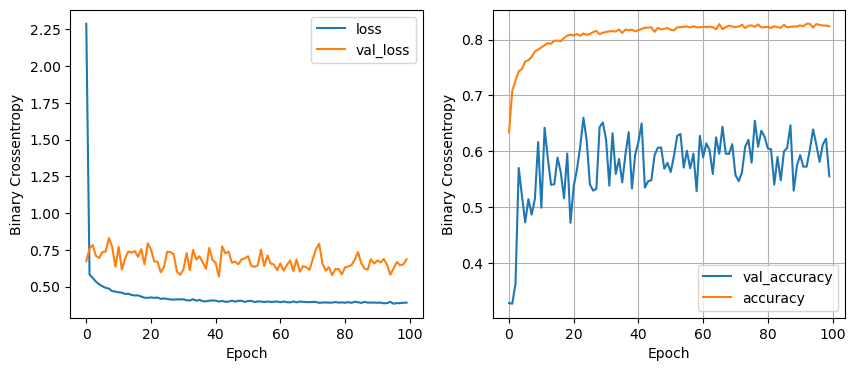

119/119 [==============================] - 0s 3ms/step - loss: 0.4109 - accuracy: 0.8260
num_nodes:32, dropout_prob : 0.2,lr : 0.0001 ,batch_size : 32


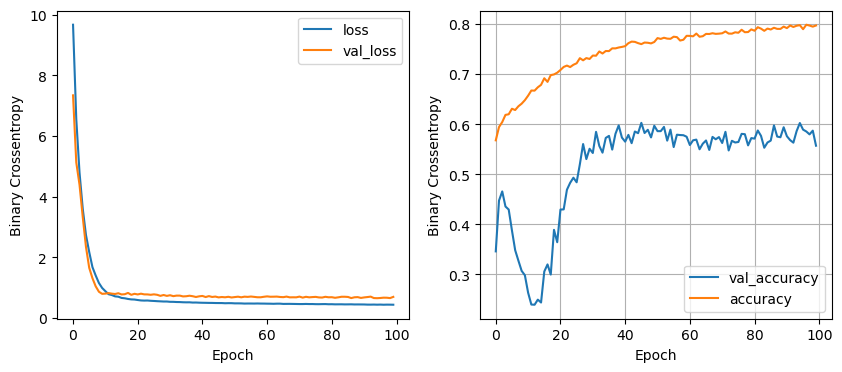

119/119 [==============================] - 0s 2ms/step - loss: 0.4142 - accuracy: 0.8260
num_nodes:32, dropout_prob : 0.2,lr : 0.0001 ,batch_size : 64


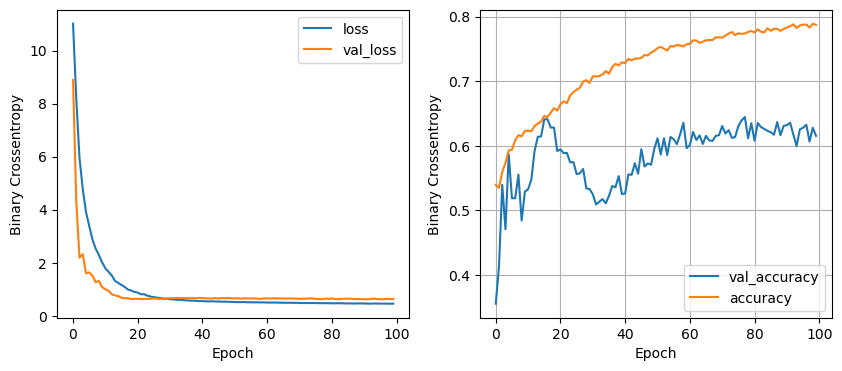

119/119 [==============================] - 0s 2ms/step - loss: 0.4303 - accuracy: 0.8202
num_nodes:32, dropout_prob : 0.2,lr : 0.0001 ,batch_size : 128


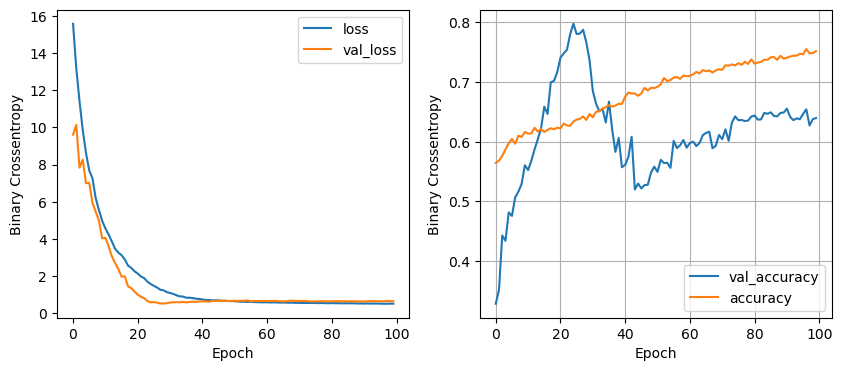

119/119 [==============================] - 0s 2ms/step - loss: 0.4840 - accuracy: 0.7787
num_nodes:64, dropout_prob : 0,lr : 0.01 ,batch_size : 32


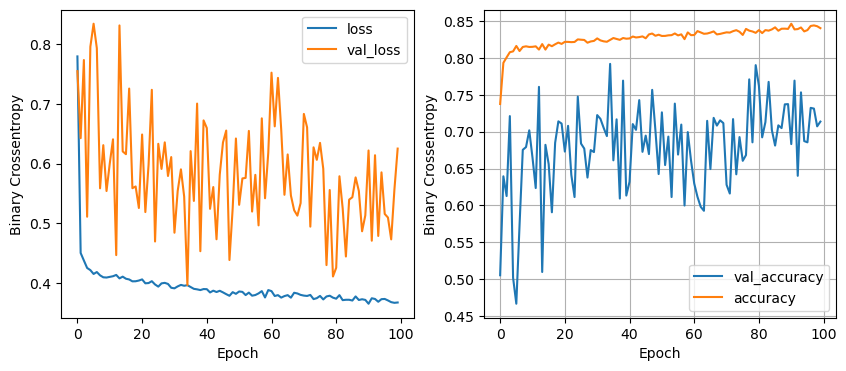

119/119 [==============================] - 0s 2ms/step - loss: 0.3887 - accuracy: 0.8436
num_nodes:64, dropout_prob : 0,lr : 0.01 ,batch_size : 64


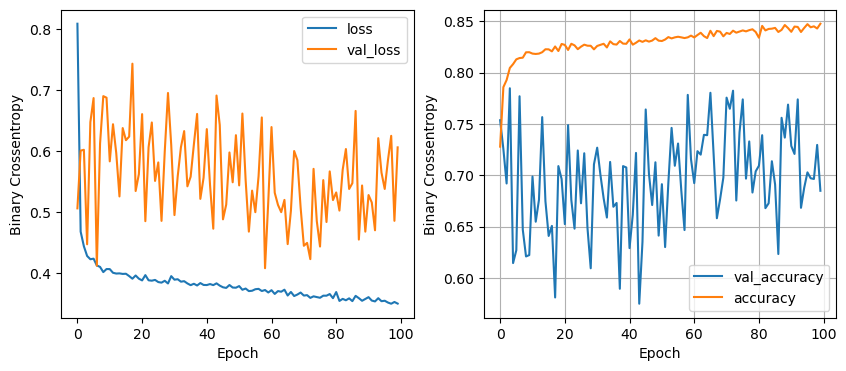

119/119 [==============================] - 0s 2ms/step - loss: 0.3663 - accuracy: 0.8515
num_nodes:64, dropout_prob : 0,lr : 0.01 ,batch_size : 128


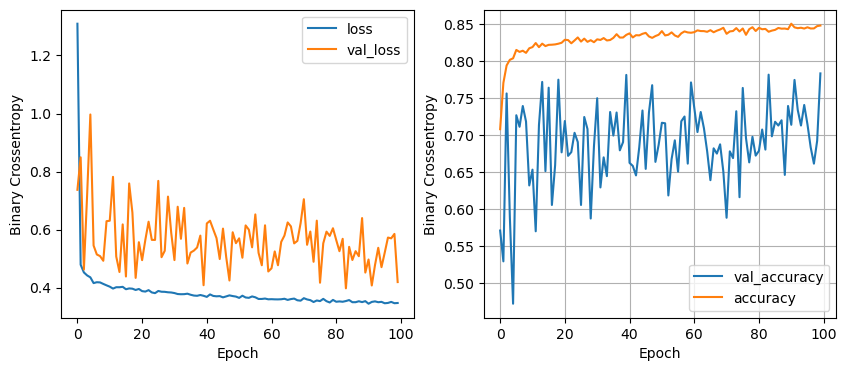

119/119 [==============================] - 0s 2ms/step - loss: 0.3994 - accuracy: 0.8299
num_nodes:64, dropout_prob : 0,lr : 0.005 ,batch_size : 32


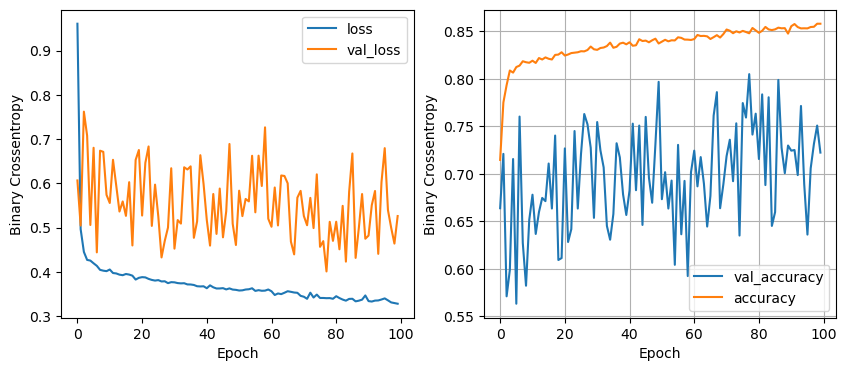

119/119 [==============================] - 0s 2ms/step - loss: 0.3771 - accuracy: 0.8533
num_nodes:64, dropout_prob : 0,lr : 0.005 ,batch_size : 64


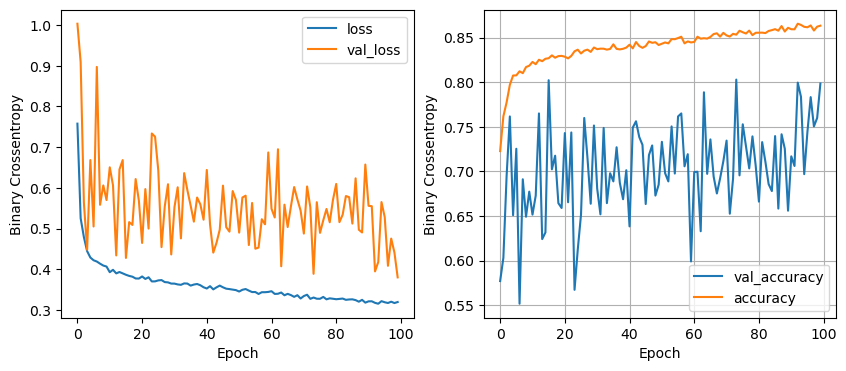

119/119 [==============================] - 0s 2ms/step - loss: 0.4041 - accuracy: 0.8339
num_nodes:64, dropout_prob : 0,lr : 0.005 ,batch_size : 128


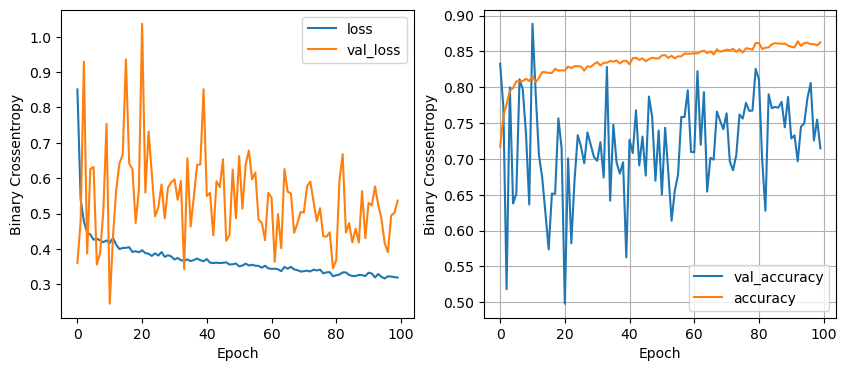

119/119 [==============================] - 0s 2ms/step - loss: 0.3910 - accuracy: 0.8478
num_nodes:64, dropout_prob : 0,lr : 0.0001 ,batch_size : 32


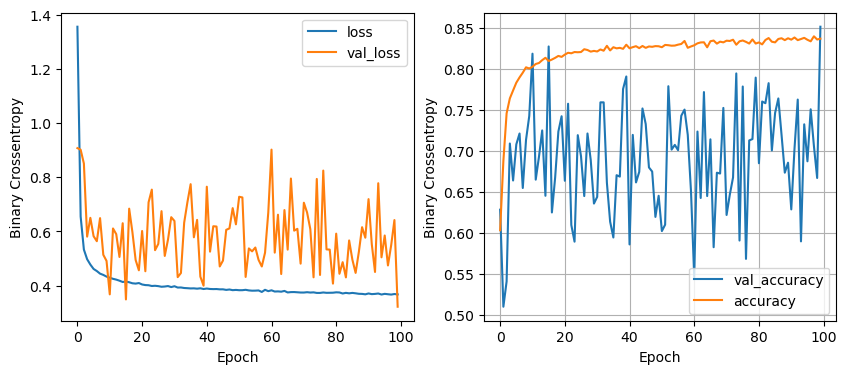

119/119 [==============================] - 0s 1ms/step - loss: 0.4652 - accuracy: 0.7792
num_nodes:64, dropout_prob : 0,lr : 0.0001 ,batch_size : 64


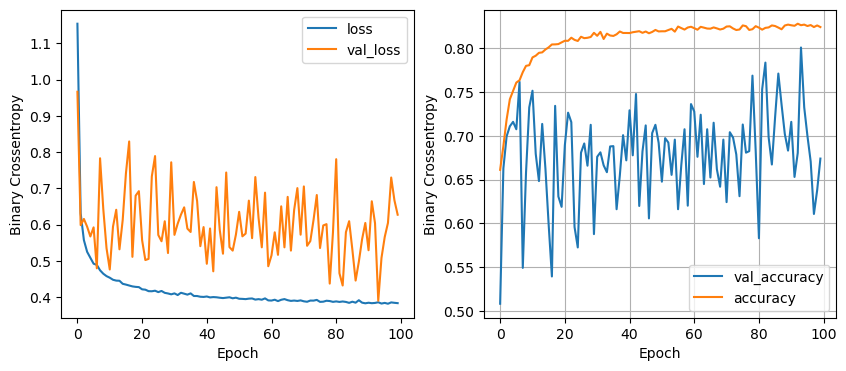

119/119 [==============================] - 0s 2ms/step - loss: 0.4037 - accuracy: 0.8165
num_nodes:64, dropout_prob : 0,lr : 0.0001 ,batch_size : 128


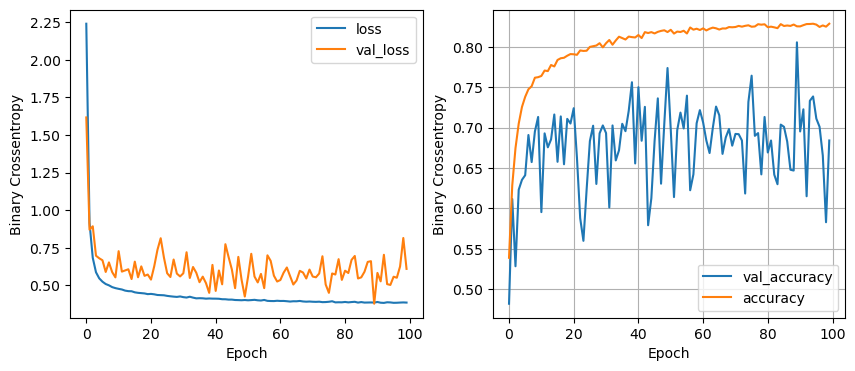

119/119 [==============================] - 0s 2ms/step - loss: 0.4027 - accuracy: 0.8244
num_nodes:64, dropout_prob : 0.2,lr : 0.01 ,batch_size : 32


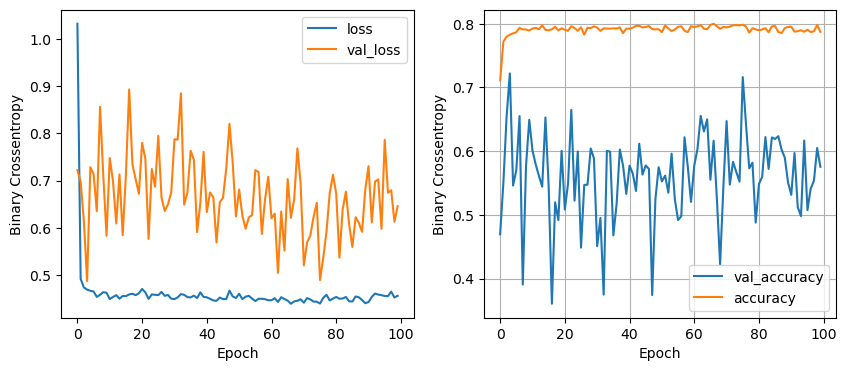

119/119 [==============================] - 0s 2ms/step - loss: 0.4273 - accuracy: 0.8102
num_nodes:64, dropout_prob : 0.2,lr : 0.01 ,batch_size : 64


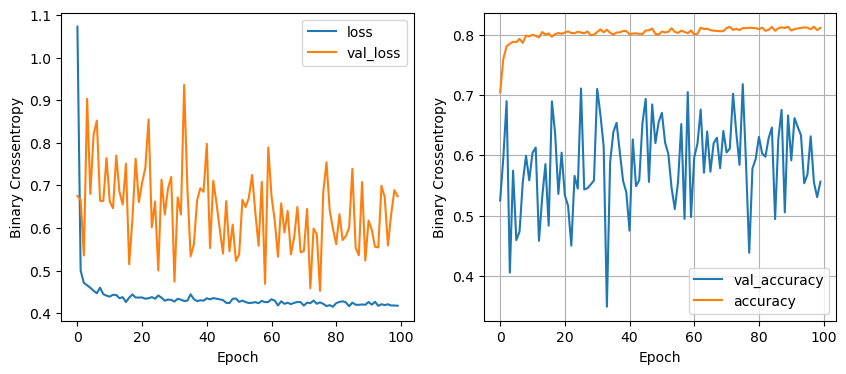

119/119 [==============================] - 0s 1ms/step - loss: 0.4038 - accuracy: 0.8278
num_nodes:64, dropout_prob : 0.2,lr : 0.01 ,batch_size : 128


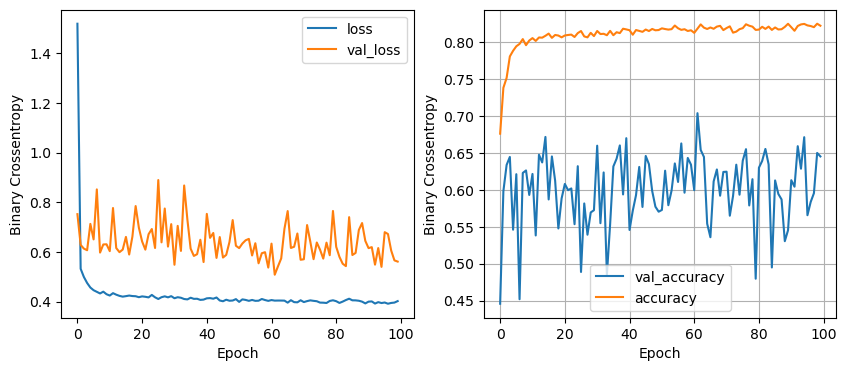

119/119 [==============================] - 0s 2ms/step - loss: 0.3827 - accuracy: 0.8454
num_nodes:64, dropout_prob : 0.2,lr : 0.005 ,batch_size : 32


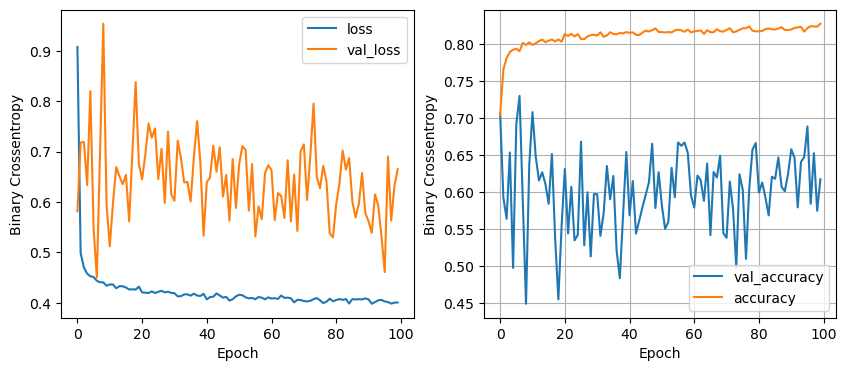

119/119 [==============================] - 0s 1ms/step - loss: 0.3774 - accuracy: 0.8415
num_nodes:64, dropout_prob : 0.2,lr : 0.005 ,batch_size : 64


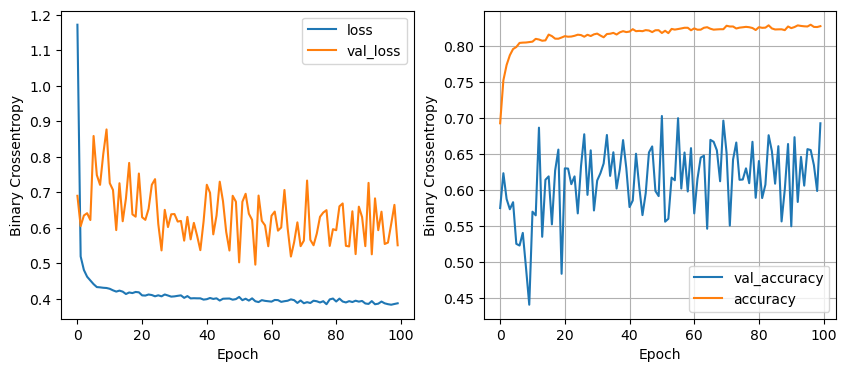

119/119 [==============================] - 0s 2ms/step - loss: 0.3834 - accuracy: 0.8312
num_nodes:64, dropout_prob : 0.2,lr : 0.005 ,batch_size : 128


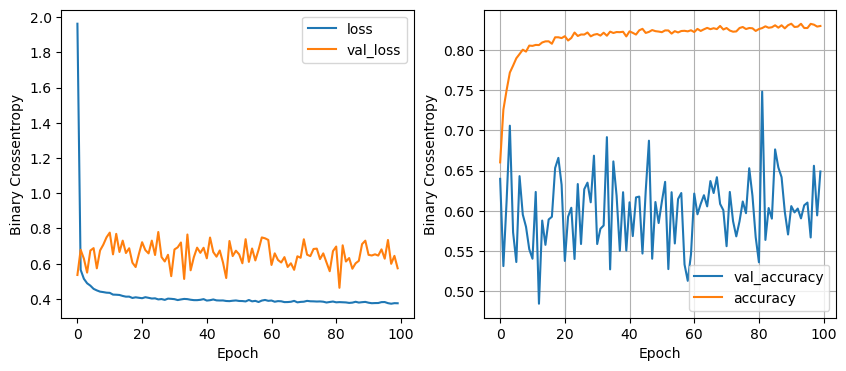

119/119 [==============================] - 0s 2ms/step - loss: 0.3884 - accuracy: 0.8373
num_nodes:64, dropout_prob : 0.2,lr : 0.0001 ,batch_size : 32


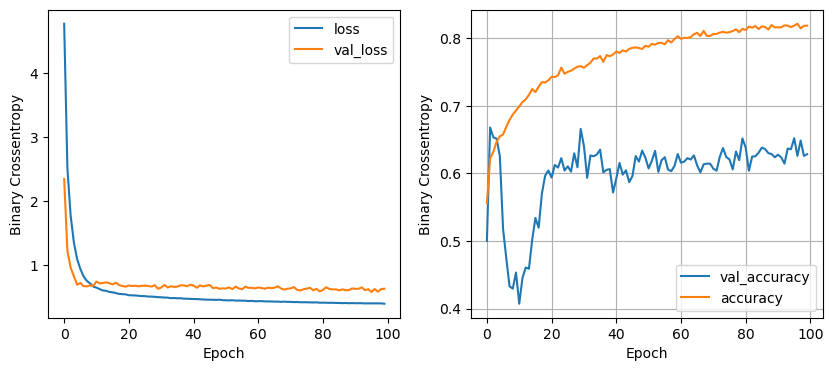

119/119 [==============================] - 0s 2ms/step - loss: 0.3900 - accuracy: 0.8336
num_nodes:64, dropout_prob : 0.2,lr : 0.0001 ,batch_size : 64


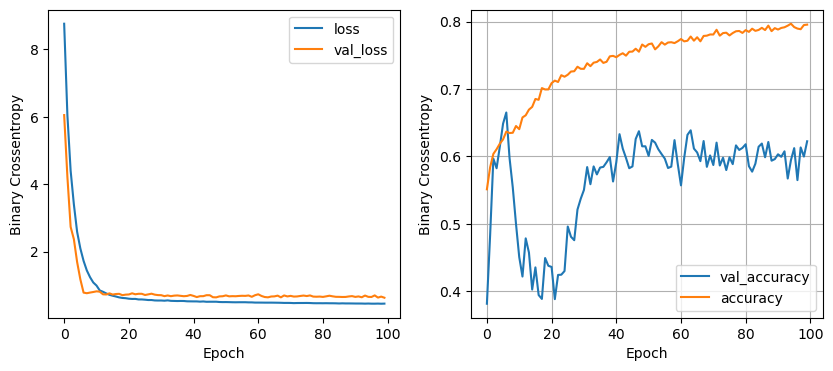

119/119 [==============================] - 0s 2ms/step - loss: 0.4187 - accuracy: 0.8210
num_nodes:64, dropout_prob : 0.2,lr : 0.0001 ,batch_size : 128


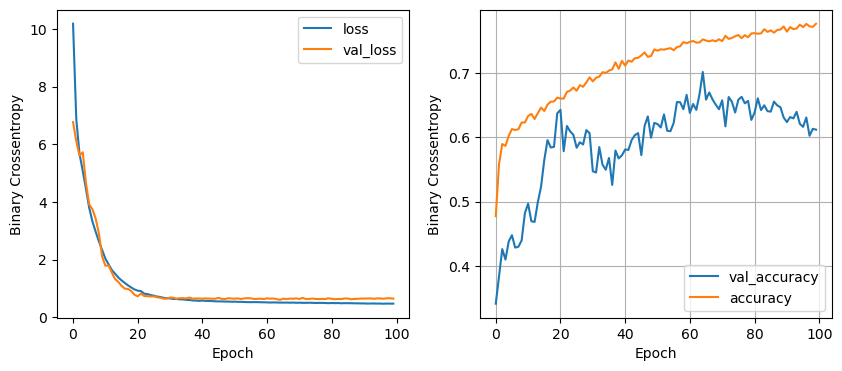

119/119 [==============================] - 0s 2ms/step - loss: 0.4436 - accuracy: 0.8152


In [90]:
least_loss_val = float("inf")
least_loss_model = None
epochs = 100
for num_nodes in [16,32,64]:
    for dropout_prob in [0,0.2]:
        for lr in [0.01, 0.005,.0001]:
            for batch_size in [32,64,128]:
                print(f'num_nodes:{num_nodes}, dropout_prob : {dropout_prob},lr : {lr} ,batch_size : {batch_size}')
                History,nn_model = training_func(X_train , y_label , dropout_prob, epochs,lr ,batch_size,num_nodes)
                plot_history(History)    
                
                val_loss = nn_model.evaluate(X_val , y_val)[0]
                if val_loss < least_loss_val:
                    least_loss_val = val_loss
                    loss_model = nn_model 

Here , we can see that the training set(orange) performs way better than the validation set this is because the model has adapt to the training set with time whereas the vaidation set is an unseen data 

In [93]:
nn_predict = loss_model.predict(X_test)

119/119 [==============================] - 0s 1ms/step


In [101]:
nn_values = (nn_predict > 0.5).astype(int).reshape(-1,)

In [103]:
print(classification_report(nn_values,y_test))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89      2543
           1       0.76      0.80      0.78      1261

    accuracy                           0.85      3804
   macro avg       0.83      0.84      0.83      3804
weighted avg       0.85      0.85      0.85      3804



In [105]:
print(classification_report(svm_predict, y_test))


              precision    recall  f1-score   support

           0       0.88      0.84      0.86      2569
           1       0.69      0.75      0.72      1235

    accuracy                           0.81      3804
   macro avg       0.79      0.80      0.79      3804
weighted avg       0.82      0.81      0.81      3804



The neural network outperformed the SVM model , here is the best model for the Dataset 